📍 본 노트북 내용은 인프런 강의 `파이썬(Python)으로 데이터 기반 주식 퀀트 투자하기 Part1`를 학습하고 정리한 내용임을 밝힙니다.

In [1]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('max_columns', None)

# 데이터 준비

In [2]:
df = pd.read_csv("my_data/naver_finance/2016_12.csv")

In [3]:
df.head()

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
0,AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000
1,BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000
2,BNK금융지주,49126.760,14.499,10.546,5181.144,7.919,0.564,NaN,1568.237,20810.660,15358.993,5.535,0.417,0.565,8680.000,9420.000
3,BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000
4,CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000


price1은 16년 12월, price2는 17년 12월 데이터

## 수익률 구하기 (16.12 ~ 17.12)

In [5]:
df['rtn'] = df['price2'] / df['price'] - 1

# PER 값에 따라 group number 부여하기

## 값을 기준으로 grouping 하기 (DIFFERENT number of members in each  group)

### boolean selection & loc 사용

- 곧 뒤에서 배울 `cut()` 을 사용하면 아래 방법보다 더 쉽게 가능합니다. 하지만 여기서 진행하는 방식들도 매우 중요하니 반드시 익혀두세요!

In [6]:
df['PER(배)']

0       10.301
1       22.757
2        5.535
3       19.020
4       28.181
        ...   
676     32.218
677   -191.546
678     20.574
679      7.664
680     -7.579
Name: PER(배), Length: 681, dtype: float64

In [7]:
(df['PER(배)'] >= 10).head()

0     True
1     True
2    False
3     True
4     True
Name: PER(배), dtype: bool

In [8]:
# cut 개념
bound1 = df['PER(배)'] >= 10
bound2 = (5 <= df['PER(배)']) & (df['PER(배)'] < 10)
bound3 = (0 <= df['PER(배)']) & (df['PER(배)'] < 5)
bound4 = df['PER(배)'] < 0

In [9]:
df.shape

(681, 17)

In [10]:
df[bound1].shape # = df.loc[bound1].shape

(378, 17)

In [ ]:
df.loc[bound1].shape  # get_operation 개념

In [ ]:
df.loc[bound1, 'PBR(배)'] = 1  # bound1을 만족하는 PBR(배) value를 1로 덮어 씌워라

In [11]:
df.loc[bound1, 'PER_Score'] = 1  # set_operation 개념
                                 # bound1을 만족하면 새로운 컬럼을 생성하고 value를 1로 채워라

In [12]:
df.head()

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_Score
0,AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000,0.223,1.000
1,BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000,-0.638,1.000
2,BNK금융지주,49126.760,14.499,10.546,5181.144,7.919,0.564,NaN,1568.237,20810.660,15358.993,5.535,0.417,0.565,8680.000,9420.000,0.085,NaN
3,BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000,-0.229,1.000
4,CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000,-0.029,1.000


In [13]:
df.loc[bound2, 'PER_Score'] = 2
df.loc[bound3, 'PER_Score'] = 3
df.loc[bound4, 'PER_Score'] = -1

In [14]:
df['PER_Score'].head()

0   1.000
1   1.000
2   2.000
3   1.000
4   1.000
Name: PER_Score, dtype: float64

In [15]:
df['PER_Score'].nunique()

4

In [16]:
df['PER_Score'].value_counts()

1.000     378
2.000     148
-1.000    120
3.000      23
Name: PER_Score, dtype: int64

- `PER_Score`가 float number로 나오는 이유?

In [17]:
df['PER_Score'].hasnans  # NaN 값이 존재하기 때문

True

In [18]:
df['PER_Score'].isna().sum()

12

In [19]:
df['PER(배)'].isna().sum()

12

In [20]:
df[df['PER(배)'].isna()]

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_Score
27,HSD엔진,8029.166,0.528,-22.571,-1812.265,-32.685,-13.120,2.749,-2607.575,7687.264,11552.757,NaN,0.404,NaN,2290.000,2569.000,0.122,NaN
103,고려개발,6238.648,4.223,-4.895,-305.362,141.454,-4.903,20.462,-3118.716,1988.392,63716.438,NaN,6.327,NaN,12430.000,11659.000,-0.062,NaN
126,까뮤이앤씨,1397.081,3.180,2.331,32.563,6.721,2.390,7.808,72.117,1153.474,3094.153,NaN,0.958,NaN,1105.000,1010.000,-0.086,NaN
133,남영비비안,2074.953,-0.949,-1.103,-22.895,-1.667,-1.371,-2.101,-32.324,2031.729,3021.213,NaN,0.436,NaN,885.000,777.000,-0.122,NaN
203,티탑스,940.880,-7.061,-4.217,-39.673,-8.980,-4.092,NaN,-1917.146,19287.736,44614.258,NaN,0.058,NaN,1115.000,1575.000,0.413,NaN
231,롯데칠성음료,22642.120,6.463,3.054,691.439,2.961,1.531,3.109,5107.448,172911.200,166829.270,NaN,8.363,NaN,145675.000,132900.000,-0.088,NaN
371,쌍용양회공업,14302.892,18.027,12.243,1751.111,11.589,5.694,9.037,400.919,3627.562,3319.079,NaN,0.816,NaN,2960.000,3730.000,0.260,NaN
507,컨버즈,459.748,-19.328,-35.526,-163.331,NaN,NaN,NaN,-33811.426,20164.525,95172.870,NaN,0.397,NaN,4416.000,1750.000,-0.604,NaN
560,풀무원,20306.730,1.869,0.491,99.778,6.765,0.979,1.933,4881.663,6986.189,533111.700,NaN,2.011,NaN,14050.000,17200.000,0.224,NaN
622,한일철강,1112.614,5.475,4.236,47.131,3.405,1.467,4.510,249.431,8408.528,5453.988,NaN,0.297,NaN,2500.000,2645.000,0.058,NaN


In [21]:
df.loc[df['PER_Score'].isna(), "PER_Score"] = 0  # NaN값을 0으로 채워줌

# 아래와 같은 방식으로도 가능
# df['PER_Score'] = df['PER_Score'].fillna(0) 
# df.loc[:, 'PER_Score'] = df['PER_Score'].fillna(0)

### boolean series 의 연산 특성 사용

In [23]:
df.loc[:, "PER_Score"]

0      1.000
1      1.000
2      2.000
3      1.000
4      1.000
       ...  
676    1.000
677   -1.000
678    1.000
679    2.000
680   -1.000
Name: PER_Score, Length: 681, dtype: float64

In [24]:
df.loc[:, "PER_Score1"] = (bound1 * 1)  + (bound2 * 2) + (bound3 * 3) + (bound4 * -1) 
df.loc[:, "PER_Score1"]

0      1
1      1
2      2
3      1
4      1
      ..
676    1
677   -1
678    1
679    2
680   -1
Name: PER_Score1, Length: 681, dtype: int32

In [25]:
df['PER_Score1'].head()

0    1
1    1
2    2
3    1
4    1
Name: PER_Score1, dtype: int32

In [26]:
df['PER_Score1'].value_counts()

 1    378
 2    148
-1    120
 3     23
 0     12
Name: PER_Score1, dtype: int64

In [27]:
df['PER_Score'].value_counts()

1.000     378
2.000     148
-1.000    120
3.000      23
0.000      12
Name: PER_Score, dtype: int64

### 위의 두 score series는 서로 같을까? 

In [28]:
df['PER_Score'].equals(df['PER_Score1'])  # dtype이 다르기 때문

False

In [29]:
df['PER_Score'].dtypes
df['PER_Score1'].dtypes

dtype('float64')

dtype('int32')

In [30]:
df['PER_Score'].astype(int).equals(df['PER_Score1'])

True

### `cut()`

In [31]:
per_cuts = pd.cut(
    df['PER(배)'],
    [-np.inf, 0, 5, 10, np.inf], # infinite
)

per_cuts.head()

0    (10.0, inf]
1    (10.0, inf]
2    (5.0, 10.0]
3    (10.0, inf]
4    (10.0, inf]
Name: PER(배), dtype: category
Categories (4, interval[float64]): [(-inf, 0.0] < (0.0, 5.0] < (5.0, 10.0] < (10.0, inf]]

In [32]:
per_cuts.iloc[0]

Interval(10.0, inf, closed='right')

In [33]:
per_cuts.value_counts()

(10.0, inf]    378
(5.0, 10.0]    148
(-inf, 0.0]    120
(0.0, 5.0]      23
Name: PER(배), dtype: int64

In [34]:
per_cuts.isna().sum()

12

- cut()과 동시에 label 달아주기

In [35]:
bins = [-np.inf, 10, 20, np.inf]
labels = ['저평가주', '보통주', '고평가주']
per_cuts2 = pd.cut(
    df['PER(배)'], 
    bins=bins, 
    labels=labels
)
per_cuts2.head()

0     보통주
1    고평가주
2    저평가주
3     보통주
4    고평가주
Name: PER(배), dtype: category
Categories (3, object): ['저평가주' < '보통주' < '고평가주']

In [36]:
# df.loc[:, 'PER_score2'] = per_cuts  # or per_cuts2
# df['PER_score2'] = per_cuts         # or per_cuts2

## Group내 데이터 갯수를 기준으로 grouping 하기 (SAME number of members in each  group)

### `qcut()`

In [37]:
pd.qcut(df['PER(배)'], 3, labels=[1,2,3]).head()  # 그룹에 속하는 숫자의 수가 동일함(정규분포의 면적이 동일한 것)

0    2
1    3
2    1
3    3
4    3
Name: PER(배), dtype: category
Categories (3, int64): [1 < 2 < 3]

In [38]:
df.loc[:, 'PER_Score2'] = pd.qcut(df['PER(배)'], 10, labels=range(1, 11))
df.head()

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_Score,PER_Score1,PER_Score2
0,AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000,0.223,1.000,1,5
1,BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000,-0.638,1.000,1,8
2,BNK금융지주,49126.760,14.499,10.546,5181.144,7.919,0.564,NaN,1568.237,20810.660,15358.993,5.535,0.417,0.565,8680.000,9420.000,0.085,2.000,2,3
3,BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000,-0.229,1.000,1,8
4,CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000,-0.029,1.000,1,9


In [39]:
df['PER_Score2'].value_counts()

1     67
2     67
3     67
4     67
5     67
7     67
8     67
9     67
10    67
6     66
Name: PER_Score2, dtype: int64

In [40]:
df['PER_Score2'].hasnans

True

In [41]:
df['PER_Score2'].isna().sum()

12

In [42]:
df['PER_Score2'].dtype

CategoricalDtype(categories=range(1, 11), ordered=True)

- 'category' type: A string variable consisting of only a few different values

In [ ]:
# DataFrame에서 category dtype인 columns들 추출하기
# df.select_dtypes(include=['category']).columns

In [44]:
df['PER_Score2'].head()

0    5
1    8
2    3
3    8
4    9
Name: PER_Score2, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [45]:
df['PER_Score2'].value_counts()

1     67
2     67
3     67
4     67
5     67
7     67
8     67
9     67
10    67
6     66
Name: PER_Score2, dtype: int64

In [46]:
df = df.dropna(subset=['PER(배)'])

In [47]:
df['PER_Score2'].isna().sum()

0

# Split - Apply - Combine 

In [48]:
df = pd.read_csv("my_data/naver_finance/2016_12.csv")
df.shape

(681, 16)

In [49]:
df = df.dropna()
df.shape

(609, 16)

In [50]:
g_df = df.copy()
g_df.head()

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
0,AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000
1,BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000
3,BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000
4,CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000
5,CJ CGV,14322.454,4.911,0.393,56.217,3.105,0.284,2.919,583.051,17654.154,67682.260,120.744,3.988,1.040,70400.000,74200.000


## Group score 생성

In [51]:
g_df['rtn'] = g_df['price2'] / g_df['price'] - 1

In [52]:
g_df.loc[:, 'PER_score'] = pd.qcut(g_df['PER(배)'], 10, labels=range(1, 11))
g_df.loc[:, 'PBR_score'] = pd.qcut(g_df['PBR(배)'], 10, labels=range(1, 11))

In [53]:
g_df.set_index('ticker', inplace=True)

In [54]:
g_df.head()

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_score,PBR_score
ticker,,,,,,,,,,,,,,,,,,
AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000,0.223,5,7
BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000,-0.638,8,10
BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000,-0.229,8,5
CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000,-0.029,9,8
CJ CGV,14322.454,4.911,0.393,56.217,3.105,0.284,2.919,583.051,17654.154,67682.260,120.744,3.988,1.040,70400.000,74200.000,0.054,10,10


In [56]:
# g_df.get_dtype_counts()

## groupby() & aggregation

- `groupby()`
    - 실제로 grouping까지는 하지 않고, grouping이 가능한지 validation만 진행(preparation)
- Aggregation
    - 2가지 요소로 구성
        - aggregating columns
        - aggregating functions
            - e.g. `sum, min, max, mean, count, variacne, std` etc

- 결국, 3가지 요소만 충족시키면 됨!
    - Grouping columns (cateogorial data type)
    - Aggregating columns
    - Aggregating functions

### `groupby` object 살펴보기

In [57]:
g_df.groupby('PER_score')

In [58]:
g_df_obj = g_df.groupby(["PBR_score", "PER_score"])
g_df_obj

In [59]:
type(g_df_obj)

pandas.core.groupby.generic.DataFrameGroupBy

In [60]:
g_df_obj.ngroups

96

In [61]:
g_df['PBR_score'].nunique()
g_df['PER_score'].nunique()

10

10

- "ngroups와 (g_df['PBR_score'].nunique() x g_df['PER_score'].nunique())가 차이가 나는 이유"에 대해서 생각해보기

In [62]:
type(g_df_obj.size())

pandas.core.series.Series

In [63]:
g_df_obj.size().head()

PBR_score  PER_score
1          1             5
           2            11
           3            11
           4            11
           5             7
dtype: int64

In [64]:
# Multi-level index를 가진 Series indexing하는 법 
g_df_obj.size().loc[1]
g_df_obj.size().loc[(1, 1)]

PER_score
1      5
2     11
3     11
4     11
5      7
6      2
7      4
8      0
9      3
10     7
dtype: int64

5

In [65]:
# Series -> DataFrame으로 변환
g_df_obj.size().to_frame().head()

0
PBR_score PER_score    
1         1           5
          2          11
          3          11
          4          11
          5           7

In [66]:
type(g_df_obj.groups)
g_df_obj.groups.keys()
g_df_obj.groups.values ()

pandas.io.formats.printing.PrettyDict

dict_keys([(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 9), (1, 10), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (9, 1), (9, 2), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (10, 1), (10, 2), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10)])

dict_values([Index(['E1', 'S&T중공업', '디아이동일', '한국수출포장공업', '휴스틸'], dtype='object', name='ticker'), Index(['LS네트웍스', 'STX', 'STX중공업', '두산건설', '삼부토건', '서연', '전방', '한국가스공사',
       '한국전자홀딩스', '한진중공업', '한진중공업홀딩스'],
      dtype='object', name='ticker'), Index(['KISCO홀딩스', '세아홀딩스', '신대양제지', '아세아', '아세아시멘트', '예스코홀딩스', '지엠비코리아',
       '지역난방공사', '케이비아이동국실업', '한국전력공사', '한국프랜지공업'],
      dtype='object', name='ticker'), Index(['계룡건설산업', '대한화섬', '아세아제지', '인지컨트롤스', '평화홀딩스', '한국공항', '한국제지', '한국철강',
       '한일홀딩스', '한진', '현대제철'],
      dtype='object', name='ticker'), Index(['CS홀딩스', '대성홀딩스', '대한제분', '삼성공조', '삼천리', '성창기업지주', '하이스틸'], dtype='object', name='ticker'), Index(['경동인베스트', '유성기업'], dtype='object', name='ticker'), Index(['서울도시가스', '선창산업', '일신방직', '화천기공'], dtype='object', name='ticker'), Index(['가온전선', '롯데쇼핑', '삼아알미늄'], dtype='object', name='ticker'), Index(['KEC', 'S&T홀딩스', '무림페이퍼', '영흥철강', '유니온', '태광산업', '혜인'], dtype='object', name='ticker'), Index(['GS건설', '대한방직', '무림P&P', '삼성중공업', '신원', '한솔홀딩

In [67]:
# Retrieve specific group
g_df_obj.get_group((1, 1))

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_score,PBR_score
ticker,,,,,,,,,,,,,,,,,,
E1,39959.008,0.277,-0.949,-379.397,-2.350,-1.076,-1.633,-3869.011,191789.690,582492.800,-16.206,0.327,0.108,62700.000,56900.000,-0.093,1,1
S&T중공업,4680.078,-0.309,-5.221,-244.358,-3.671,-2.697,-0.791,-734.851,21043.785,14074.280,-12.369,0.432,0.646,9089.000,7310.000,-0.196,1,1
디아이동일,8224.145,2.100,0.132,10.885,-0.753,0.111,0.051,-1523.407,270773.030,333554.280,-37.365,0.210,0.171,56922.000,51884.000,-0.089,1,1
한국수출포장공업,2282.604,1.344,-0.091,-2.075,-0.092,-0.069,0.152,-51.880,56026.280,57065.100,-345.030,0.319,0.314,17900.000,15650.000,-0.126,1,1
휴스틸,3640.215,0.370,-0.153,-5.562,-0.143,-0.101,0.059,-80.399,55779.490,52614.773,-191.546,0.276,0.293,15400.000,15450.000,0.003,1,1


- For loop을 이용해서 grouping된 object 확인해보기 (많이는 안쓰임)

In [68]:
for name, group in g_df_obj:
    print(name)
    group.head(2)
    break

(1, 1)


,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_score,PBR_score
ticker,,,,,,,,,,,,,,,,,,
E1,39959.008,0.277,-0.949,-379.397,-2.350,-1.076,-1.633,-3869.011,191789.690,582492.800,-16.206,0.327,0.108,62700.000,56900.000,-0.093,1,1
S&T중공업,4680.078,-0.309,-5.221,-244.358,-3.671,-2.697,-0.791,-734.851,21043.785,14074.280,-12.369,0.432,0.646,9089.000,7310.000,-0.196,1,1


In [70]:
# 참고 :groupby()에 대해 head()를 적용하면, 기존이 head()가 작동하는 방식, 즉, 최상위 2개를 가지고 오는게 아니라
# 각 그룹별 최상위 2개를 무작위로 섞어서 하나로 합친 DataFrame을 리턴함
g_df.groupby('PER_score')

In [71]:
g_df.groupby('PER_score').head(2)

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_score,PBR_score
ticker,,,,,,,,,,,,,,,,,,
AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000,0.223,5,7
BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000,-0.638,8,10
BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000,-0.229,8,5
CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000,-0.029,9,8
CJ CGV,14322.454,4.911,0.393,56.217,3.105,0.284,2.919,583.051,17654.154,67682.260,120.744,3.988,1.040,70400.000,74200.000,0.054,10,10
CJ대한통운,60819.457,3.756,1.122,682.101,2.390,1.361,4.947,2445.658,133105.080,266607.660,73.191,1.345,0.671,179000.000,140000.000,-0.218,10,8
CS홀딩스,1231.450,16.105,13.918,171.388,4.409,5.921,12.719,7994.886,186451.840,106666.850,10.094,0.433,0.757,80700.000,80200.000,-0.006,5,1
DB,2048.100,5.324,-10.113,-207.128,-13.052,-8.434,66.574,-113.728,881.178,1124.549,-6.454,0.833,0.653,734.000,658.000,-0.104,2,5
DB하이텍,7731.402,22.302,11.427,883.440,29.647,8.962,24.540,1984.761,7900.009,17369.578,8.011,2.013,0.915,15900.000,12000.000,-0.245,4,9


### aggreggation

- 반드시 "aggregating" 기능이 있는 function 을 써야함
    - min, max, mean, median, sum, var, size, nunique, idxmax

In [72]:
g_df.groupby("PBR_score").agg(
    {
        "rtn": "mean", # =  np.mean
    }
)

,rtn
PBR_score,
1,-0.001
2,0.020
3,-0.021
4,0.161
5,-0.012
6,-0.043
7,0.150
8,0.058
9,0.139


In [73]:
pbr_rtn_df = g_df.groupby("PBR_score").agg({'rtn': 'mean'})
per_rtn_df = g_df.groupby("PER_score").agg({'rtn': 'mean'})

In [74]:
pbr_rtn_df.head()

,rtn
PBR_score,
1,-0.001
2,0.020
3,-0.021
4,0.161
5,-0.012


In [75]:
# 다양한 방법으로 진행하기 (같은 결과)
g_df.groupby("PER_score")['rtn'].agg('mean').head()
g_df.groupby("PER_score")['rtn'].agg(np.mean).head()
g_df.groupby("PER_score")['rtn'].mean().head()  # 복수의 operation을 진행할 수 없는 단점이 있음

PER_score
1   -0.062
2   -0.083
3   -0.038
4    0.056
5    0.000
Name: rtn, dtype: float64

PER_score
1   -0.062
2   -0.083
3   -0.038
4    0.056
5    0.000
Name: rtn, dtype: float64

PER_score
1   -0.062
2   -0.083
3   -0.038
4    0.056
5    0.000
Name: rtn, dtype: float64

In [76]:
# return type이 다를 수 있음에 주의
g_df.groupby("PER_score")['rtn'].agg("mean").head(2)   # Series로 return
g_df.groupby("PER_score")[['rtn']].agg("mean").head(2)  # DataFrame으로 return

PER_score
1   -0.062
2   -0.083
Name: rtn, dtype: float64

,rtn
PER_score,
1,-0.062
2,-0.083


In [77]:
# 2개 이상의 컬럼에 대해 aggregation
g_df.groupby("PER_score")[['rtn', 'PBR(배)']].agg("mean").head(2)

,rtn,PBR(배)
PER_score,,
1,-0.062,1.839
2,-0.083,1.323


In [78]:
# 2개 이상의 aggregation
g_df.groupby("PER_score")[['rtn', 'PBR(배)']].agg(["mean", "std"]).head(2)

rtn       PBR(배)      
            mean   std   mean   std
PER_score                          
1         -0.062 0.328  1.839 2.215
2         -0.083 0.781  1.323 1.167

In [79]:
# 2개 이상의 컬럼 & 각각에 대해 다른 aggregation
g_df.groupby("PBR_score").agg(
    {
        'rtn': ['mean', 'std'],
        'PER(배)': ['min']
        
    }
)

rtn           PER(배)
            mean   std        min
PBR_score                        
1         -0.001 0.262   -345.030
2          0.020 0.280   -319.356
3         -0.021 0.219    -10.614
4          0.161 0.770   -938.983
5         -0.012 0.265    -62.397
6         -0.043 0.251   -310.606
7          0.150 0.704   -107.741
8          0.058 0.472 -27857.496
9          0.139 0.669   -352.735
10         0.054 0.464   -442.464

- aggregation function이 아닌경우 => `agg()`가 error를 발생시킴


In [80]:
# sqrt는 aggregation 방식의 연산이 아님!
np.sqrt([1, 2, 3, 4])

array([1.        , 1.41421356, 1.73205081, 2.        ])

In [81]:
g_df.groupby("PER_score")['rtn'].agg(np.sqrt)

C:\Users\kyung\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Must produce aggregated value

- Visualization(시각화) 맛보기

In [82]:
%matplotlib inline

<AxesSubplot:xlabel='PBR_score'>

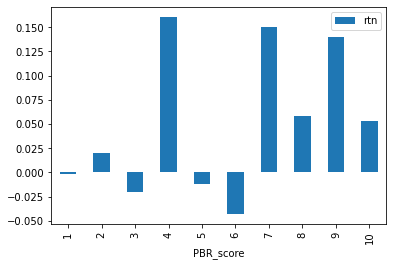

In [83]:
pbr_rtn_df.plot(kind='bar')

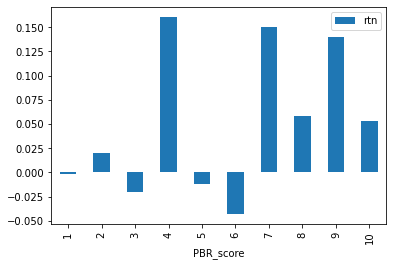

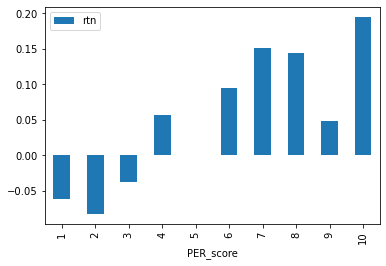

In [84]:
pbr_rtn_df.plot(kind='bar');
per_rtn_df.plot(kind='bar');

### Examples

In [89]:
g_df1 = g_df.groupby(["PBR_score", "PER_score"])\
            .agg(
                {
                    'rtn': ['mean', 'std', 'min', 'max'],
                    'ROE(%)': [np.mean, 'size', 'nunique', 'idxmax'] 
                 }
            )   # .agg가 있기 때문에 \을 넣어 주어야 함
g_df1.head()

rtn                     ROE(%)                       
                      mean   std    min   max    mean size nunique    idxmax
PBR_score PER_score                                                         
1         1         -0.100 0.072 -0.196 0.003  -1.402    5       5  한국수출포장공업
          2         -0.093 0.266 -0.482 0.437 154.967   11      11      삼부토건
          3          0.117 0.359 -0.556 0.683   6.952   11      11    한국전력공사
          4          0.106 0.295 -0.273 0.882   5.104   11      11      한국공항
          5         -0.039 0.120 -0.206 0.113   3.941    7       7    성창기업지주

In [91]:
a = g_df.groupby(["PBR_score", "PER_score"])['rtn', 'ROE(%)'].agg(['sum', 'mean'])
a

<ipython-input-91-299d41a7beb8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = g_df.groupby(["PBR_score", "PER_score"])['rtn', 'ROE(%)'].agg(['sum', 'mean'])


rtn          ROE(%)        
                       sum   mean      sum    mean
PBR_score PER_score                               
1         1         -0.499 -0.100   -7.009  -1.402
          2         -1.025 -0.093 1704.634 154.967
          3          1.290  0.117   76.477   6.952
          4          1.165  0.106   56.146   5.104
          5         -0.275 -0.039   27.590   3.941
...                    ...    ...      ...     ...
10        6          0.368  0.368   30.086  30.086
          7         -0.193 -0.096   46.513  23.257
          8          3.179  0.212  311.986  20.799
          9         -1.532 -0.139  184.775  16.798
          10         4.236  0.303   56.480   4.034

[100 rows x 4 columns]

In [92]:
# Multi-index라고 해서 쫄 것 없음!
a.loc[1]
a.loc[(1, 3)]
a.loc[[(1, 3), (1, 4 )]]

rtn          ROE(%)        
             sum   mean      sum    mean
PER_score                               
1         -0.499 -0.100   -7.009  -1.402
2         -1.025 -0.093 1704.634 154.967
3          1.290  0.117   76.477   6.952
4          1.165  0.106   56.146   5.104
5         -0.275 -0.039   27.590   3.941
6         -0.666 -0.333    6.710   3.355
7         -0.126 -0.031   11.435   2.859
8          0.000    NaN    0.000     NaN
9         -0.175 -0.058    3.039   1.013
10         0.226  0.032    2.873   0.410

rtn     sum     1.290
        mean    0.117
ROE(%)  sum    76.477
        mean    6.952
Name: (1, 3), dtype: float64

rtn       ROE(%)      
                      sum  mean    sum  mean
PBR_score PER_score                         
1         3         1.290 0.117 76.477 6.952
          4         1.165 0.106 56.146 5.104

### 주의: nan은 groupby시 자동으로 filter out 되기 때문에(counting이 안됨), 미리 전처리 다 하는게 좋음 

In [93]:
df = pd.DataFrame({
    'a':['소형주', np.nan, '대형주', '대형주'],
    'b':[np.nan, 2,         3,     np.nan],
})
df

,a,b
0,소형주,NaN
1,NaN,2.000
2,대형주,3.000
3,대형주,NaN


In [94]:
df.groupby(['a'])['b'].mean()

a
대형주   3.000
소형주     NaN
Name: b, dtype: float64

###  `as_index = False` : group cols들이 index가 아니라 하나의 col이 됨 (aggregate하고 reset_index()를 취한 것)

In [95]:
a = g_df.groupby(["PER_score"]                ).agg({'rtn': ['mean', 'std']}).head(2)
b = g_df.groupby(["PER_score"], as_index=False).agg({'rtn': ['mean', 'std']}).head(2)

In [96]:
a
b

rtn      
            mean   std
PER_score             
1         -0.062 0.328
2         -0.083 0.781

PER_score    rtn      
              mean   std
0         1 -0.062 0.328
1         2 -0.083 0.781

In [97]:
a.index
a.columns

CategoricalIndex([1, 2], categories=[1, 2, 3, 4, 5, 6, 7, 8, ...], ordered=True, name='PER_score', dtype='category')

MultiIndex([('rtn', 'mean'),
            ('rtn',  'std')],
           )

In [98]:
b.index
b.columns

Int64Index([0, 1], dtype='int64')

MultiIndex([('PER_score',     ''),
            (      'rtn', 'mean'),
            (      'rtn',  'std')],
           )

In [99]:
a['rtn']

,mean,std
PER_score,,
1,-0.062,0.328
2,-0.083,0.781


In [100]:
a[('rtn', 'mean')].head()

PER_score
1   -0.062
2   -0.083
Name: (rtn, mean), dtype: float64

### Multi-index columns을 하나로 병합하기

In [101]:
g_df1.head()

rtn                     ROE(%)                       
                      mean   std    min   max    mean size nunique    idxmax
PBR_score PER_score                                                         
1         1         -0.100 0.072 -0.196 0.003  -1.402    5       5  한국수출포장공업
          2         -0.093 0.266 -0.482 0.437 154.967   11      11      삼부토건
          3          0.117 0.359 -0.556 0.683   6.952   11      11    한국전력공사
          4          0.106 0.295 -0.273 0.882   5.104   11      11      한국공항
          5         -0.039 0.120 -0.206 0.113   3.941    7       7    성창기업지주

In [102]:
level0 = g_df1.columns.get_level_values(0)
level1 = g_df1.columns.get_level_values(1)

level0
level1

Index(['rtn', 'rtn', 'rtn', 'rtn', 'ROE(%)', 'ROE(%)', 'ROE(%)', 'ROE(%)'], dtype='object')

Index(['mean', 'std', 'min', 'max', 'mean', 'size', 'nunique', 'idxmax'], dtype='object')

In [103]:
g_df1.columns = level0 + '_' + level1

In [104]:
g_df1.head(2)

rtn_mean  rtn_std  rtn_min  rtn_max  ROE(%)_mean  \
PBR_score PER_score                                                     
1         1            -0.100    0.072   -0.196    0.003       -1.402   
          2            -0.093    0.266   -0.482    0.437      154.967   

                     ROE(%)_size  ROE(%)_nunique ROE(%)_idxmax  
PBR_score PER_score                                             
1         1                    5               5      한국수출포장공업  
          2                   11              11          삼부토건

In [105]:
g_df1 = g_df1.reset_index()
g_df1.head()

,PBR_score,PER_score,rtn_mean,rtn_std,rtn_min,rtn_max,ROE(%)_mean,ROE(%)_size,ROE(%)_nunique,ROE(%)_idxmax
0,1,1,-0.100,0.072,-0.196,0.003,-1.402,5,5,한국수출포장공업
1,1,2,-0.093,0.266,-0.482,0.437,154.967,11,11,삼부토건
2,1,3,0.117,0.359,-0.556,0.683,6.952,11,11,한국전력공사
3,1,4,0.106,0.295,-0.273,0.882,5.104,11,11,한국공항
4,1,5,-0.039,0.120,-0.206,0.113,3.941,7,7,성창기업지주


# 실전예제: 시가총액으로 Small and Big 나누기 

In [106]:
a_df = pd.read_csv("my_data/Small_and_Big.csv", index_col=[0])
a_df.head()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원)
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000
2,2000-07-31,CJ ENM,6.560,NaN,17.400,400467000000.000
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000
4,2000-07-31,CJ씨푸드,NaN,0.227,32.000,1987000000.000


In [107]:
a_df.tail()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원)
235924,2018-06-30,흥국에프엔비,0.950,1.364,-1.690,64926000000.000
235925,2018-06-30,흥국화재,0.650,0.721,8.890,383175000000.000
235926,2018-06-30,흥아해운,0.920,1.240,-5.750,134473000000.000
235927,2018-06-30,희림,1.390,0.216,2.230,86250000000.000
235928,2018-06-30,힘스,1.420,NaN,-15.820,82748000000.000


In [108]:
median_df = a_df.groupby(['date']).agg({'시가총액 (보통)(평균)(원)': 'median'})
median_df.head()

,시가총액 (보통)(평균)(원)
date,
2000-07-31,34947000000.000
2000-08-31,33684000000.000
2000-09-30,33684000000.000
2000-10-31,30523000000.000
2000-11-30,30798000000.000


In [110]:
median_df.columns = ['시가총액_median']
median_df.head()

,시가총액_median
date,
2000-07-31,34947000000.000
2000-08-31,33684000000.000
2000-09-30,33684000000.000
2000-10-31,30523000000.000
2000-11-30,30798000000.000


- 구한 median dataframe을 어떻게 가존의 원본 dataframe과 연결 시킬수있을까?
=> 다음 노트북!